In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os
import matplotlib.image as mpimg
from skimage.color import rgb2grey
import skimage

In [2]:
def region_of_interest(img, vertices):
    mask = np.zeros_like(img)
    # channel_count = img.shape[2]
    match_mask_color = (255)
    cv2.fillPoly(mask, vertices, match_mask_color)
    masked_image = cv2.bitwise_and(img, mask)
    return masked_image


In [3]:
def draw_lines(img, lines):
    img = np.copy(img)
    blank_image = np.zeros((img.shape[0], img.shape[1], 3), np.uint8)

    for line in lines:
        for x1, y1, x2, y2 in line:
            if(abs(y2-y1)>40):
                cv2.line(blank_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

    img = cv2.addWeighted(img, 0.8, blank_image, 1, 0.0)
    return img


In [4]:
def gaussian_blur(img, kernel_size):
    """Applies a Gaussian Noise kernel"""
    return cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)


In [5]:
def threshold(img):
    image=rgb2grey(img)
    global_thresh = threshold_otsu(image)
    binary_global = image > global_thresh
    return binary_global

In [6]:
# paramters we can play with 
# 1) kernel_size in blur 
# 2) region_of_interest_vertices 
# 3)thresould1 
# 4) thresould2 
# 5) put condtion on line
def lanesDetection(img):

    # print(img.shape)
    height = img.shape[0]
    width = img.shape[1]
    
    ###
    binary_image=threshold(img)
    number_of_white_pix = np.sum(binary_global == 1)
    number_of_black_pix = np.sum(binary_global == 0)
    print(number_of_white_pix,number_of_black_pix)
    if(number_of_white_pix/number_of_black_pix > .8):
        ratio=.8
    else:
        ratio=number_of_white_pix/number_of_black_pix
    ###

    region_of_interest_vertices = [
        (0, height), (width, height),(width, height*.85),(width*.7,height*ratio),(width*.3,height*ratio),(0, height*.85)
    ]
    gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    smoothed_img = gaussian_blur(img = gray_img, kernel_size = 9)
    edge = cv2.Canny(smoothed_img, 50, 100, apertureSize=3)
    cropped_image = region_of_interest(
        edge, np.array([region_of_interest_vertices], np.int32))

    lines = cv2.HoughLinesP(cropped_image, rho=2, theta=np.pi/180,
                           threshold=50, lines=np.array([]), minLineLength=10, maxLineGap=30)
    image_with_lines = draw_lines(img, lines)
    # plt.imshow(image_with_lines)
    # plt.show()
    return image_with_lines


In [7]:
for image_path in list(os.listdir('./test_images')):
    fig = plt.figure(figsize=(20, 10))
    image = mpimg.imread(f'./test_images/{image_path}')
    ax = fig.add_subplot(1, 2, 1,xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title("Input Image")
    ax = fig.add_subplot(1, 2, 2,xticks=[], yticks=[])
    plt.imshow(lanesDetection(image))
    ax.set_title("Output Image [Lane Line Detected]")
    plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: './test_images'

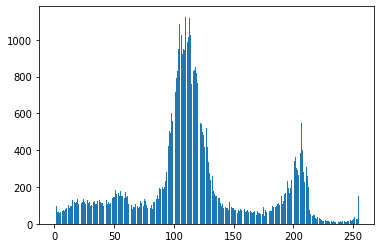

In [ ]:
from skimage.color import rgb2gray,rgb2hsv
from skimage.exposure import histogram
from matplotlib.pyplot import bar
def showHist(img,histogramImg):
    plt.figure()
    bar(histogramImg[1]*255, histogramImg[0], width=0.8, align='center')
    
image = cv2.imread('test_images/images.jfif')    
showHist(image,histogram(rgb2gray(image),nbins=256))


In [ ]:
def show_images(images,titles=None):
    #This function is used to show image(s) with titles by sending an array of images and an array of associated titles.
    # images[0] will be drawn with the title titles[0] if exists
    # You aren't required to understand this function, use it as-is.
    n_ims = len(images)
    if titles is None: titles = ['(%d)' % i for i in range(1,n_ims + 1)]
    fig = plt.figure()
    n = 1
    for image,title in zip(images,titles):
        a = fig.add_subplot(1,n_ims,n)
        if image.ndim == 2: 
            plt.gray()
        plt.imshow(image)
        a.set_title(title)
        n += 1
    fig.set_size_inches(np.array(fig.get_size_inches()) * n_ims)
    plt.show()

10553 39892


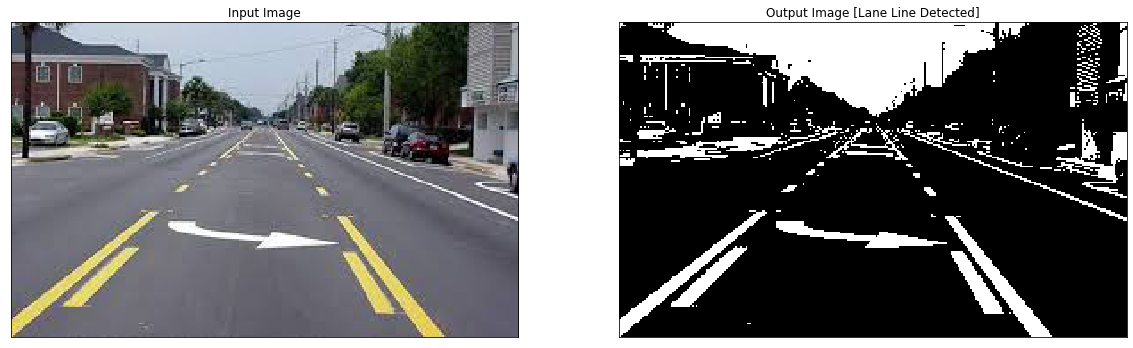

7464 42861


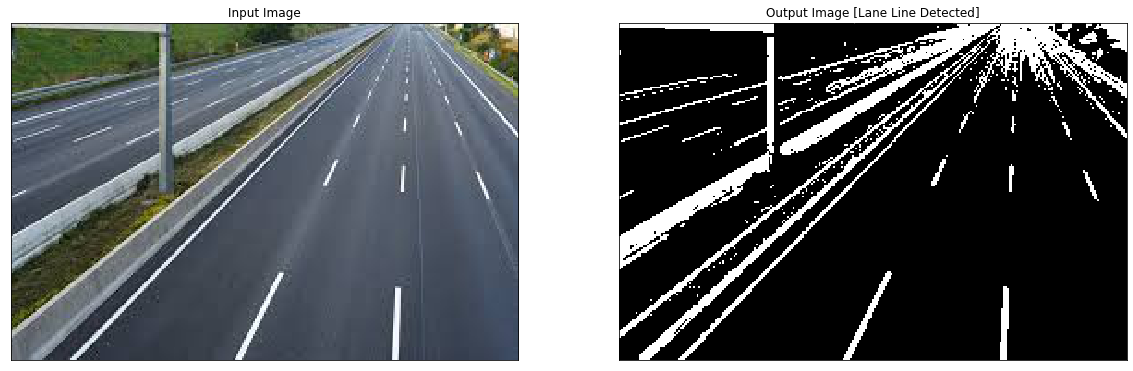

198528 80972


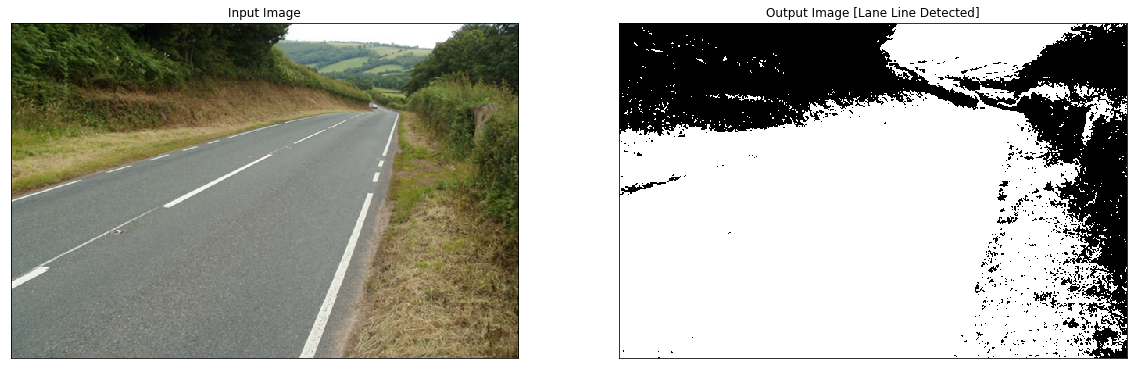

15876 34623


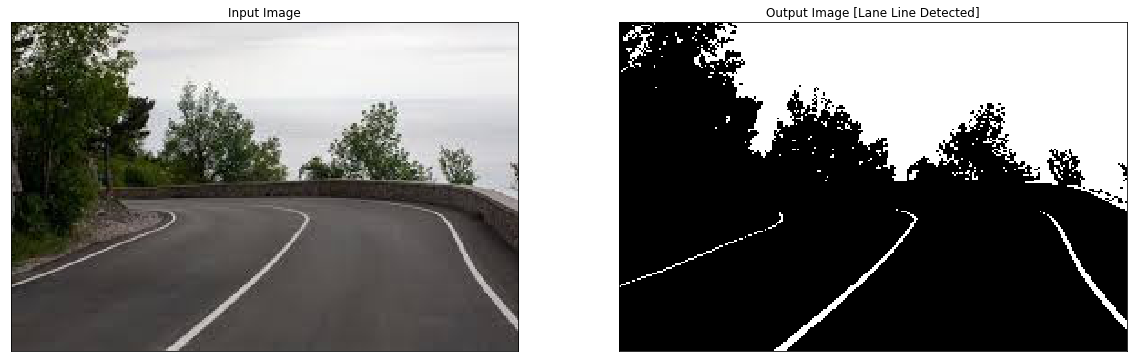

39577 10883


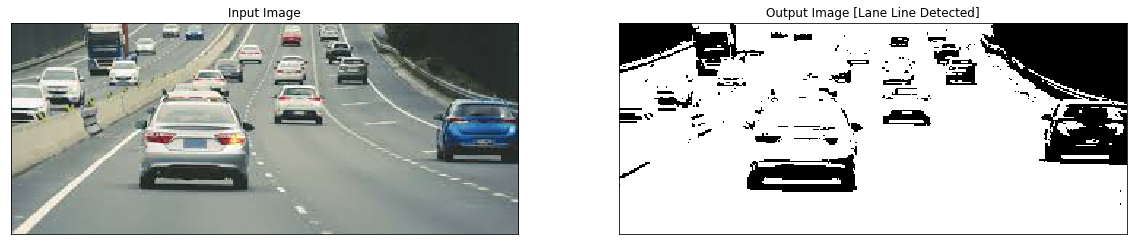

25128 214272


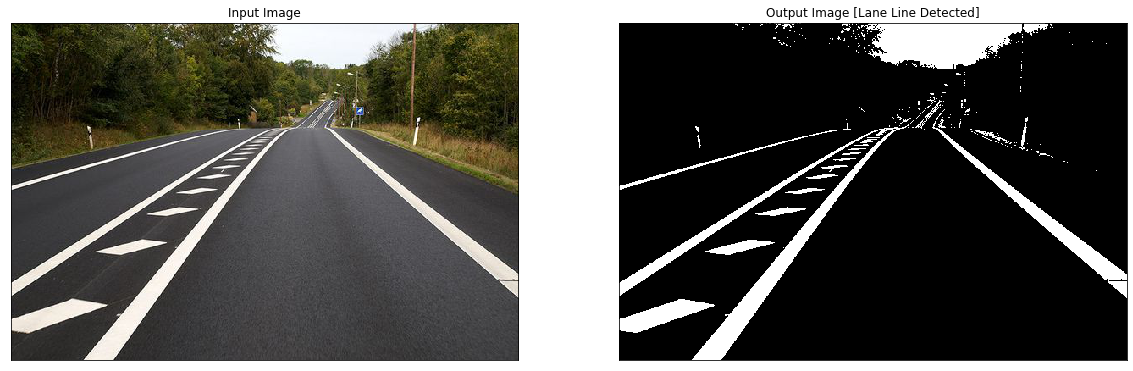

260017 258383


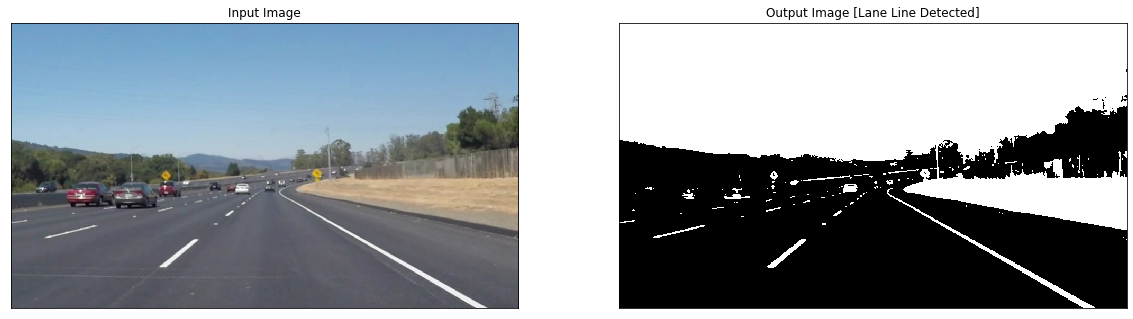

239307 279093


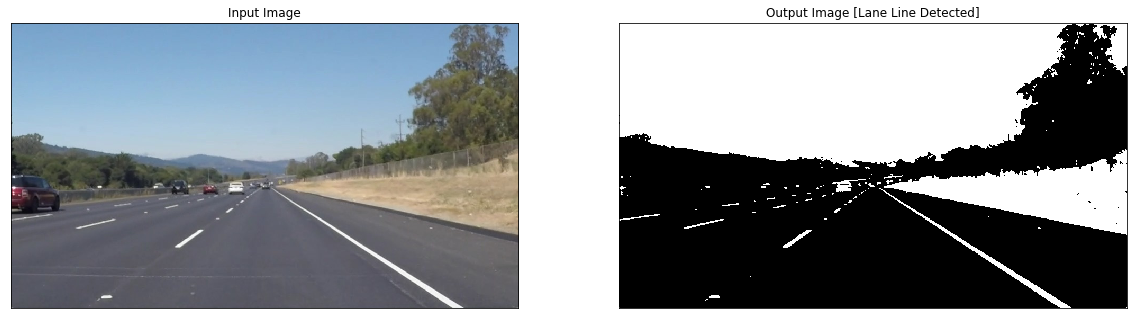

283949 234451


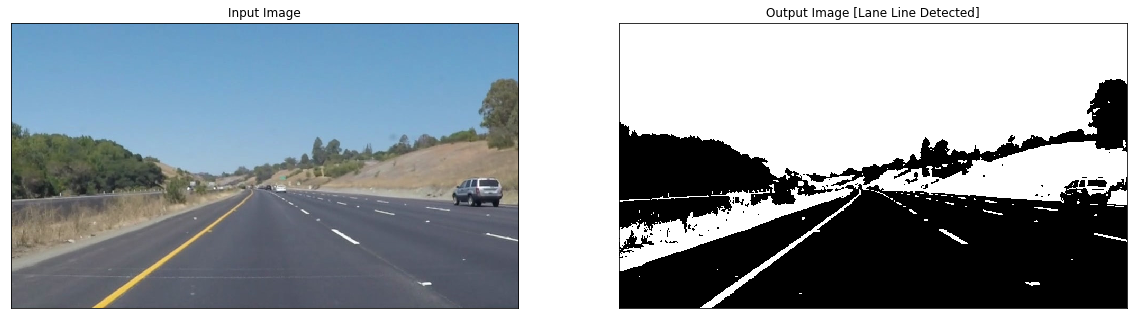

In [ ]:
from skimage.filters import threshold_otsu, try_all_threshold,threshold_local
#image = rgb2gray(cv2.imread('test_images/solidWhiteCurve.jpg'))
def threshold(img):
    image=rgb2gray(img)
    global_thresh = threshold_otsu(image)
    binary_global = image > global_thresh
    number_of_white_pix = np.sum(binary_global == 1)
    number_of_black_pix = np.sum(binary_global == 0)
    print(number_of_white_pix,number_of_black_pix)
    return binary_global

#show_images([image,binary_global], titles=['Image in Space Domain',"global threshold"])

for image_path in list(os.listdir('./test_images')):
    fig = plt.figure(figsize=(20, 10))
    image = mpimg.imread(f'./test_images/{image_path}')
    ax = fig.add_subplot(1, 2, 1,xticks=[], yticks=[])
    plt.imshow(image)
    ax.set_title("Input Image")
    ax = fig.add_subplot(1, 2, 2,xticks=[], yticks=[])
    plt.imshow(threshold(image))
    ax.set_title("Output Image [Lane Line Detected]")
    plt.show()

#fig, ax = try_all_threshold(image, figsize=(10, 8), verbose=False)
#plt.show()